# 4.1 Observation of the normal-superconducting transition using the resistivity of tin wire

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # import stats package

## Pressure to Temperature Converter

In [2]:
def pressure2temp(p_mbar): ## converts pressure of helium in mbar to temperature in K
    x = np.log10(p_mbar) ##note that log10() is used as opposed to log()
    T = 1.24177 + 0.23793*(x) + 0.36207*(x**2) - 0.33188*(x**3) + 0.20738*(x**4) - 0.05294*(x**5) + 0.00552*(x**6)
    return T

In [3]:
pressure2temp(101)

2.4931902013704796

## 4.1.2 The Normal -Superconducting Transition

In [4]:
ResistivityDataRemote = pd.read_csv("./../data/resistivity/ResistivityDataRemote.txt", "\t", names=["Helium Pressure", "V+", "V-"])

In [5]:
##ResistivityDataRemote

In [6]:
ResistivityDataRemote = ResistivityDataRemote.drop(ResistivityDataRemote.index[range(0,6)]) ##drop unnecessary rows

In [7]:
##ResistivityDataRemote

N.B. the measurements in the lower regime are made at 1.002 A

In [8]:
helium_pressure = ResistivityDataRemote['Helium Pressure'].values.astype(float)
v_plus = ResistivityDataRemote['V+'].values.astype(float)
v_minus = ResistivityDataRemote['V-'].values.astype(float)

In [9]:
current = 1.002 ## current value for the lower regime in A

helium_temp = pressure2temp(helium_pressure)
v_average = (np.absolute(v_plus) + np.absolute(v_minus))/2

resistance_plus = v_plus/current
resistance_minus = np.absolute(v_minus)/current
resistance_average = v_average/current

In [10]:
# plt.plot(helium_temp, resistance_plus)
# ## plt.title('Pressure against V')
# plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
# plt.ylabel('Resistance Plus (Ohms)') # Plot a label on x axis of Xlabel on graph
# plt.show()

In [11]:
# plt.plot(helium_temp, resistance_minus)
# ## plt.title('Pressure against V')
# plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
# plt.ylabel('Resistance Minus (Ohms)') # Plot a label on x axis of Xlabel on graph
# plt.show()

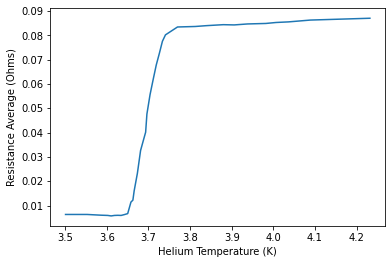

In [12]:
plt.plot(helium_temp, resistance_average)
## plt.title('Pressure against V')
plt.xlabel('Helium Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance Average (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.show()

In [13]:
helium_temp_trans = []
resistance_average_trans = []

for i in range(len(resistance_average)):
    if resistance_average[i] > 0.01 and resistance_average[i] < 0.08:
        helium_temp_trans.append(helium_temp[i])
        resistance_average_trans.append(resistance_average[i])

        
helium_temp_trans = np.array(helium_temp_trans)
resistance_average_trans = np.array(resistance_average_trans)

In [14]:
## add linear fit

X = sm.add_constant(helium_temp_trans) # add a constant to fit
results = sm.OLS(resistance_average_trans, X).fit() # save results of fit
print(results.summary()) # print results out to screen

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1526.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.75e-13
Time:                        15:52:33   Log-Likelihood:                 63.145
No. Observations:                  13   AIC:                            -122.3
Df Residuals:                      11   BIC:                            -121.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4055      0.088    -38.576      0.0

/usr/local/anaconda3/envs/superconductivity/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


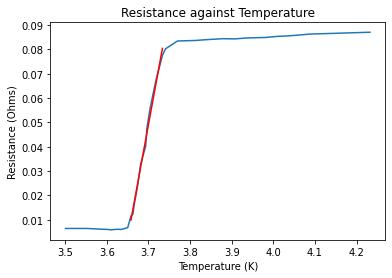

In [15]:
plt.plot(helium_temp, resistance_average)
plt.plot(helium_temp_trans, results.params[0]+results.params[1]*helium_temp_trans, 'r' , label='fitted_line')
plt.title('Resistance against Temperature')
plt.xlabel('Temperature (K)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance (Ohms)') # Plot a label on x axis of Xlabel on graph

plt.show()

In [16]:
#Calculating the critical temperature
R_min = min(resistance_plus)
R_max = max(resistance_plus)
Rc = (R_min + R_max)/2

Tc = (Rc - results.params[0])/results.params[1]
print(Tc)

3.700180284478112


## 4.1.3 Critical Magnetic Field

In [17]:
mylist = os.listdir("./../data/resistivity")

In [18]:
##mylist

In [19]:
mylist.remove('ResistivityDataRemote.txt')

In [20]:
##mylist

In [21]:
press_list = []

for i in range(len(mylist)):
    x = mylist[i]
    x = x[6:]
    x = x[:-2]
    press_list.append(int(x))
        
press_array = np.array(sorted(press_list))
temp_array = pressure2temp(press_array)

In [22]:
## temp_array

In [23]:
# ProbeA3mB = pd.read_csv("./../data/resistivity/ProbeA3mB", "\t")
# ProbeA3mB = ProbeA3mB.drop(ProbeA3mB.index[0])
# shv_3mB = ProbeA3mB['Shunt Voltage (V)'].values.astype(float)
# sv_3mB = ProbeA3mB['Sample Voltage (V)'].values.astype(float)

# v_per_a = 0.5
# tesla_per_a = 0.018
# current = 1.002


# shv_3mB = np.array(shv_3mB)
# sv_3mB = np.array(sv_3mB)
# b_3mB = (shv_3mB/v_per_a)*tesla_per_a
# r_3mB = sv_3mB/current
    
# plt.plot(b_3mB, sv_3mB)
# plt.title('Flux density against Resistance')
# plt.xlabel('Resistance (Ohms)') # Plot a label on x axis of Xlabel on graph
# plt.ylabel('Flux Density (T)') # Plot a label on x axis of Xlabel on graph
# plt.show()

In [24]:
shv_array = [] ##shunt voltage array
sv_array = [] ##sample voltage array
isv_array = [] ##integrated sample voltage array
b_array = [] ##flux density array
r_array = [] ##resistance array
Bc = [] ##array of critical B values

v_per_a = 0.5
tesla_per_a = 0.018
current = 1.002

for i in range(len(press_list)):
    name = "ProbeA" + str(press_array[i]) + "mB"
    path = "./../data/resistivity/" + name
    
    df = pd.read_csv(path, "\t")
    df = df.drop(df.index[0])
    shv = df['Shunt Voltage (V)'].values.astype(float)
    sv = df['Sample Voltage (V)'].values.astype(float)
    isv = df['Integrated Sample Voltage (V)'].values.astype(float)
    
    shv = np.array(shv)
    sv = np.array(sv)
    isv = np.array(isv)
    
    
    b = (shv/v_per_a)*tesla_per_a
    r = sv/current
    
    shv_array.append(shv)
    sv_array.append(sv)
    isv_array.append(isv)
    b_array.append(b)
    r_array.append(r)
    
    ##finding the transition flux density from r
    b_trans = []
    r_trans = []
    for i in range(len(r)):
        if r[i] > 0.00001 and r[i] < 0.00008:
            b_trans.append(b[i])
            r_trans.append(b[i])         
    b_trans = np.array(b_trans)
    #B_midpoint = ( B_trans[0]+ B_trans[len(B_trans)-1] )*0.5
    if len(b_trans) != 0:
        Bc.append(( b_trans[0]+ b_trans[len(b_trans)-1] )*0.5 )

In [25]:
Bc

[0.0242951519844,
 0.020799322052399996,
 0.019041375875400002,
 0.018805895055,
 0.017275007343599998,
 0.016617214645199996,
 0.013951995861599998,
 0.0126439661754,
 0.011086610029199999,
 0.0099767191212,
 0.008652242273399998,
 0.007297535433599999,
 0.0060397536366,
 0.0055790573598,
 0.0045039420504,
 0.004231986395399999,
 0.0035558963838,
 0.0029208616937999995,
 0.002025525285,
 0.001622251971,
 0.000933790743,
 8.852325299999998e-05,
 0.0002578267908,
 8.307699600419999e-05]

In [26]:
# ##Sample Voltage against Shunt Voltage at a Range of Pressures

# for i in range(len(shv_array)): ##len(shv_array)
#     plt.plot(shv_array[i], sv_array[i])

# plt.title('Sample Voltage against Shunt Voltage at a Range of Temperatures')
# plt.xlabel('Shunt Voltage (V)') # Plot a label on x axis of Xlabel on graph
# plt.ylabel('Sample Voltage (V)') # Plot a label on x axis of Xlabel on graph
# plt.legend(np.round(temp_array, decimals =2), title = "He temp (K)", loc = 1)
# plt.show()

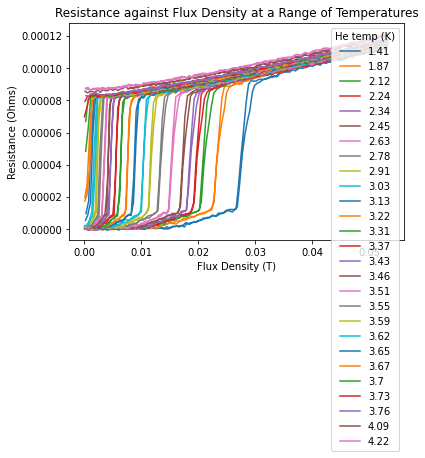

In [27]:
##Sample Voltage against Shunt Voltage at a Range of Pressures
ranges = range(len(b_array)) ## range(10,len(b_array))

for i in ranges: ##len(b_array)
    plt.plot(b_array[i], r_array[i])

plt.title('Resistance against Flux Density at a Range of Temperatures')
plt.xlabel('Flux Density (T)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Resistance (Ohms)') # Plot a label on x axis of Xlabel on graph
plt.legend(np.round(temp_array[ranges], decimals =2), title = "He temp (K)", loc = 1)
plt.show()

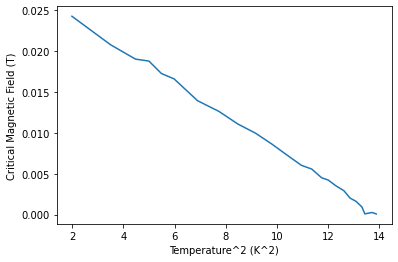

In [28]:
#Plot Bc and T 
temp_array_BC = temp_array[:len(Bc)] 
temp_square = np.square(temp_array_BC)

plt.plot(temp_square,Bc)
plt.xlabel('Temperature^2 (K^2)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Critical Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.178e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.59e-31
Time:                        15:52:34   Log-Likelihood:                 159.47
No. Observations:                  24   AIC:                            -314.9
Df Residuals:                      22   BIC:                            -312.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0285      0.000    147.588      0.0

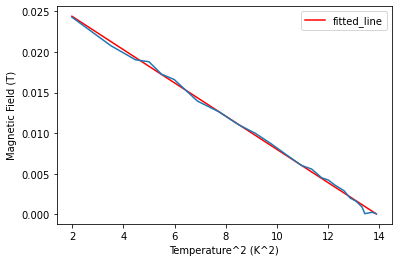

In [29]:
## add linear fit

X_TEMP = sm.add_constant(temp_square) # add a constant to fit
result = sm.OLS(Bc, X_TEMP).fit() # save results of fit
print(result.summary()) # print results out to screen

#Add fit to graph
plt.plot(temp_square, result.params[0]+result.params[1]*temp_square, 'r' , label='fitted_line')
plt.plot(temp_square,Bc)
plt.xlabel('Temperature^2 (K^2)') # Plot a label on x axis of Xlabel on graph
plt.ylabel('Magnetic Field (T)') # Plot a label on x axis of Xlabel on graph
plt.legend()
plt.show()

In [30]:
B0 = result.params[0]
grad = result.params[1]
Tc = (-B0/grad)**(1/2)
print(Tc)

3.7299567694841955


In [39]:
B0

0.028483758998340478

In [34]:
### part 5 thermo calculations

mu = 4* np.pi *10 ** (-7)
B0 ##Bc at T=0
bind_energy = (B0**2)/(2*mu)

In [35]:
bind_energy

322.81577218026206

In [37]:
gamma = (2/mu)*(B0/Tc)**2

In [38]:
gamma

92.81264298545065